In [ ]:
pip install netCDF4 h5netcdf


In [ ]:
conda install -c conda-forge netcdf4 h5netcdf

In [1]:
import xarray as xr

ds = xr.open_dataset("../data/NO2_June2022.nc")  # ya da tam yol: "C:/Users/boran/Desktop/AI-NO2-Forecast-CAMS/data/NO2_June2022.nc"
ds



C:\Users\boran\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
C:\Users\boran\anaconda3\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


<xarray.Dataset> Size: 6MB
Dimensions:         (valid_time: 12, pressure_level: 1, latitude: 241,
                     longitude: 480)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 96B 2022-06-01 ... 2022-06-03...
  * pressure_level  (pressure_level) float64 8B 500.0
  * latitude        (latitude) float64 2kB 90.0 89.25 88.5 ... -89.25 -90.0
  * longitude       (longitude) float64 4kB 0.0 0.75 1.5 ... 357.8 358.5 359.2
Data variables:
    no2             (valid_time, pressure_level, latitude, longitude) float32 6MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-06-18T22:01 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
ds

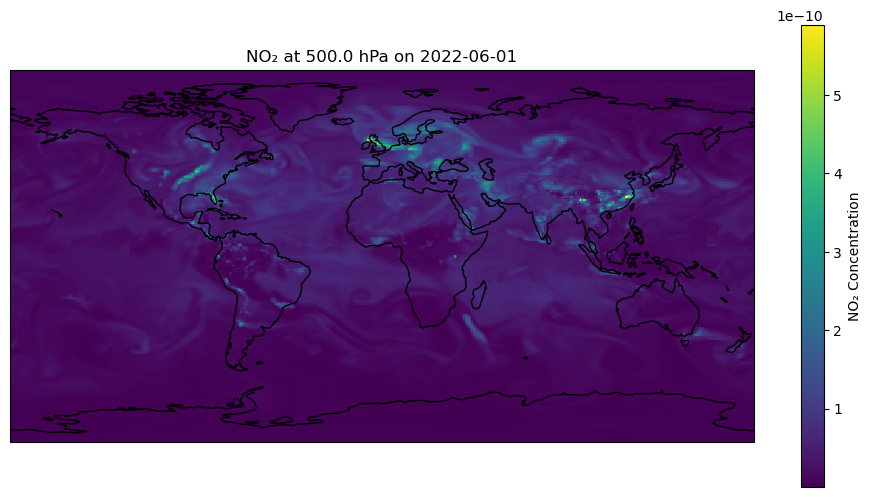

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Doğru koordinat ve zaman isimleri
time = ds.valid_time[0]
level = ds.pressure_level[0]

# NO₂ verisini seç
no2 = ds['no2'].sel(valid_time=time, pressure_level=level)

# Harita çizimi
plt.figure(figsize=(12, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
no2.plot(ax=ax, transform=ccrs.PlateCarree(), cmap="viridis", cbar_kwargs={'label': 'NO₂ Concentration'})
ax.coastlines()
plt.title(f"NO₂ at {level.values} hPa on {str(time.values)[:10]}")
plt.show()


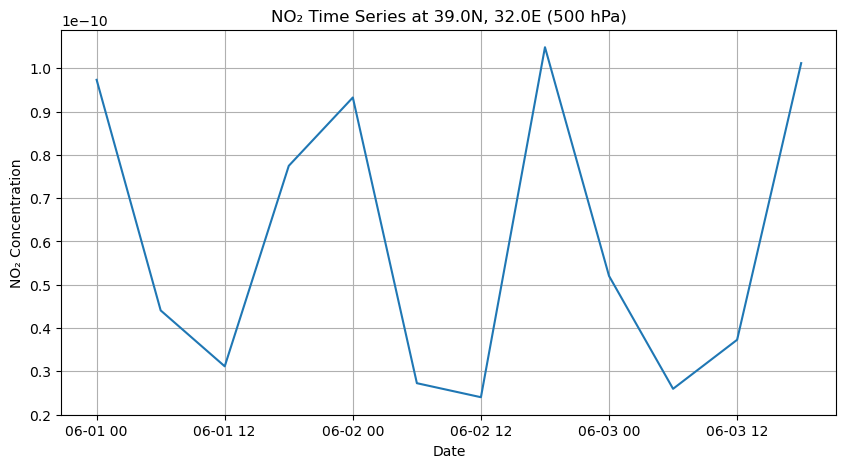

In [3]:
# Nokta seçimi
lat = 39.0
lon = 32.0
level = ds.pressure_level[0]

# NO2 zaman serisini o noktada ve 500 hPa seviyesinde al
no2_series = ds['no2'].sel(
    latitude=lat,
    longitude=lon,
    pressure_level=level,
    method='nearest'
).squeeze()

# Çiz
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(ds.valid_time.values, no2_series.values)
plt.title(f"NO₂ Time Series at {lat}N, {lon}E (500 hPa)")
plt.xlabel("Date")
plt.ylabel("NO₂ Concentration")
plt.grid()
plt.show()



In [ ]:
pip install torch scikit-learn


In [4]:
no2_series.values


array([9.73495035e-11, 4.40713091e-11, 3.11573094e-11, 7.74761436e-11,
       9.32647640e-11, 2.72605358e-11, 2.40183116e-11, 1.04877114e-10,
       5.20342658e-11, 2.59628517e-11, 3.72879644e-11, 1.01202720e-10],
      dtype=float32)

In [ ]:
[9.73495035e-11, 4.40713091e-11, 3.11573094e-11, 7.74761436e-11,
       9.32647640e-11, 2.72605358e-11, 2.40183116e-11, 1.04877114e-10,
       5.20342658e-11, 2.59628517e-11, 3.72879644e-11, 1.01202720e-10]